# Load bigfish detection results


In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
from dask.array.image import imread as imr
import tkinter as tk
from tkinter import filedialog
import random
import os
from pathlib import Path

In [2]:
import bigfish.stack as stack
import bigfish.detection as detection
from buildReferenceSpot import buildReferenceSpotFromImages

In [3]:
def getImagesAndSpotList(sequenceCell, selectedThreshold, voxelRadius, objectRadius, sampling=10):
    images=[]    
    spots_list=[]
    MaxTimePoint = sequenceCell.shape[0]

    spot_radius_px = detection.get_object_radius_pixel(
        voxel_size_nm=voxelRadius, 
        object_radius_nm=objectRadius, 
        ndim=3)

    for t in range(1,MaxTimePoint,sampling):
        rna = np.array(sequenceCell[t])
        images.append(rna)

        # LoG filter
        rna_log = stack.log_filter(rna, sigma=spot_radius_px)

        # local maximum detection
        mask = detection.local_maximum_detection(rna_log, min_distance=spot_radius_px)

        # thresholding
#         threshold = detection.automated_threshold_setting(rna_log, mask)
        spots_, _ = detection.spots_thresholding(rna_log, mask, float(selectedThreshold))
        spots_list.append(spots_)
    n=len(images)
    print("Total number of images : "+str(n))
    return images, spots_list, n

In [4]:
def getSpot2D(spotCoor, mipSequenceCell, reference_spot):
    z = spotCoor[0]
    y = spotCoor[1]
    x = spotCoor[2]

    yu = mipSequenceCell.shape[0]
    xu = mipSequenceCell.shape[1]
    delz = reference_spot.shape[0]//2
    dely = reference_spot.shape[1]//2
    delx = reference_spot.shape[2]//2

    if (y-dely)<0:
        ymin=0
    else:
        ymin=y-dely
    if (y+dely+1)>yu:
        ymax=yu
    else:
        ymax=y+dely+1
    if (x-delx)<0:
        xmin=0
    else:
        xmin=x-delx
    if (x+delx+1)>xu:
        xmax=xu
    else:
        xmax=x+delx+1

    spotVol = np.array(mipSequenceCell[ymin:ymax,xmin:xmax])
    return spotVol

In [5]:
voxelRadius = (600, 121, 121)
objectRadius = (600, 150, 150)

In [6]:
def choose_home_folder():
    root = tk.Tk()
    root.withdraw()  # Hide the main window

    file_path = filedialog.askdirectory(initialdir= "/", title='Please select a directory')  # Open file dialog

    root.destroy()  # Close the tkinter window
    return file_path

In [7]:
identifier = input('Enter an identifier for the movie : ')

Enter an identifier for the movie : TSA


In [10]:
homeFolder = choose_home_folder()


In [11]:
homeFolder

'C:/Users/uid-1204/Desktop/test2_bigFISHLIVE'

In [12]:
sessionNames =[i for i in os.listdir(homeFolder) if identifier in i and os.path.isdir(os.path.join(homeFolder,i))]
sessionName = Path(os.path.join(homeFolder, sessionNames[0]))


In [53]:
nameKey = str(sessionName.name.split('_F')[0])+'_F'
imsQ = str(sessionName.name.split('_F')[1])
cellNumber = '14'
nucleiStackForm = nameKey+imsQ+"_cell_"

cell_Crop_Folder = os.path.join(homeFolder,nameKey+imsQ,'cell_'+str(cellNumber))
pathToTimeSequenceCell = os.path.join(homeFolder,nameKey+imsQ,'cell_'+str(cellNumber),'*.tif')
moviePath = homeFolder+nameKey+imsQ

sequenceCell = imr(pathToTimeSequenceCell)
mipSequenceCell=np.max(sequenceCell, axis=1)
MaxTimePoint = sequenceCell.shape[0]

In [54]:
"""
To do 


Remove all spots from the tx regions


"""

'\nTo do \n\n\nRemove all spots from the tx regions\n\n\n'

In [55]:
cellNumber

'14'

### Perform spot detection for a handful of frames


In [56]:
baseFolder = os.path.join(homeFolder,nameKey+imsQ)
thresholdFile = pd.read_csv(baseFolder+'/thresholds.csv', index_col=0)
thresholdFile.iloc[np.where(thresholdFile['cell']=='cell_'+str(cellNumber))]
thresholdManual = int(thresholdFile.iloc[np.where(thresholdFile['cell']=='cell_'+str(cellNumber))]['threshold'])

thresholdManual

C:\Users\uid-1204\AppData\Local\Temp\ipykernel_3756\1144394982.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  thresholdManual = int(thresholdFile.iloc[np.where(thresholdFile['cell']=='cell_'+str(cellNumber))]['threshold'])


620

In [57]:
reorder=False
sampling=5
images=[]    
spots_list=[]
MaxTimePoint = sequenceCell.shape[0]
spotsFrame=[]
for t in range(0, MaxTimePoint):
    print(t)
    rna = np.array(sequenceCell[t])
    if reorder:
        rna = reorderZstack(rna,4)
    rna_mip = stack.maximum_projection(rna)

    # spot radius
    spot_radius_px = detection.get_object_radius_pixel(
        voxel_size_nm=voxelRadius,#(600, 80, 80), 
        object_radius_nm=objectRadius, 
        ndim=3)

    # LoG filter
    rna_log = stack.log_filter(rna, sigma=spot_radius_px)

    # local maximum detection
    mask = detection.local_maximum_detection(rna_log, min_distance=spot_radius_px)

    # thresholding
    spots_current, _ = detection.spots_thresholding(rna_log, mask, float(thresholdManual))
    spotsFrame.append(spots_current)
    if t in np.arange(0,MaxTimePoint, sampling):
        print('saved')
        images.append(rna)
        spots_list.append(spots_current)
    

0
saved
1
2
3
4
5
saved
6
7
8
9
10
saved
11
12
13
14
15
saved
16
17
18
19
20
saved
21
22
23
24
25
saved
26
27
28
29
30
saved
31
32
33
34
35
saved
36
37
38
39
40
saved
41
42
43
44
45
saved
46
47
48
49
50
saved
51
52
53
54
55
saved
56
57
58
59
60
saved
61
62
63
64
65
saved
66
67
68
69
70
saved
71
72
73
74
75
saved
76
77
78
79
80
saved
81
82
83
84
85
saved
86
87
88
89
90
saved
91
92
93
94
95
saved
96
97
98
99
100
saved
101
102
103
104
105
saved
106
107
108
109
110
saved
111
112
113
114
115
saved
116
117
118
119
120
saved
121
122
123
124
125
saved
126
127
128
129
130
saved
131
132
133
134
135
saved
136
137
138
139
140
saved
141
142
143
144
145
saved
146
147
148
149
150
saved
151
152
153
154
155
saved
156
157
158
159
160
saved
161
162
163
164
165
saved
166
167
168
169
170
saved
171
172
173
174
175
saved
176
177
178
179
180
saved
181
182
183
184
185
saved
186
187
188
189
190
saved
191
192
193
194
195
saved
196
197
198
199
200
saved
201
202
203
204
205
saved
206
207
208
209
210
saved
211
212


In [58]:
len(images)

180

In [59]:
#Verify for a particular alpha
referenceSpot_gamma = 3
referenceSpot_Alpha = 0.5

## Build reference spot
reference_spot, spots_found, max_intensity = buildReferenceSpotFromImages(images, spots_list, 
                                                                          alpha=referenceSpot_Alpha, 
                                                                          gamma=referenceSpot_gamma, 
                                                                          voxelSize=voxelRadius, 
                                                                          objectSize=objectRadius)

image list found!
Found 4898
Found 4898 spots, max intensity = 2576


In [60]:
framn=random.sample(range(MaxTimePoint),1)[0] #which frame to use for verification

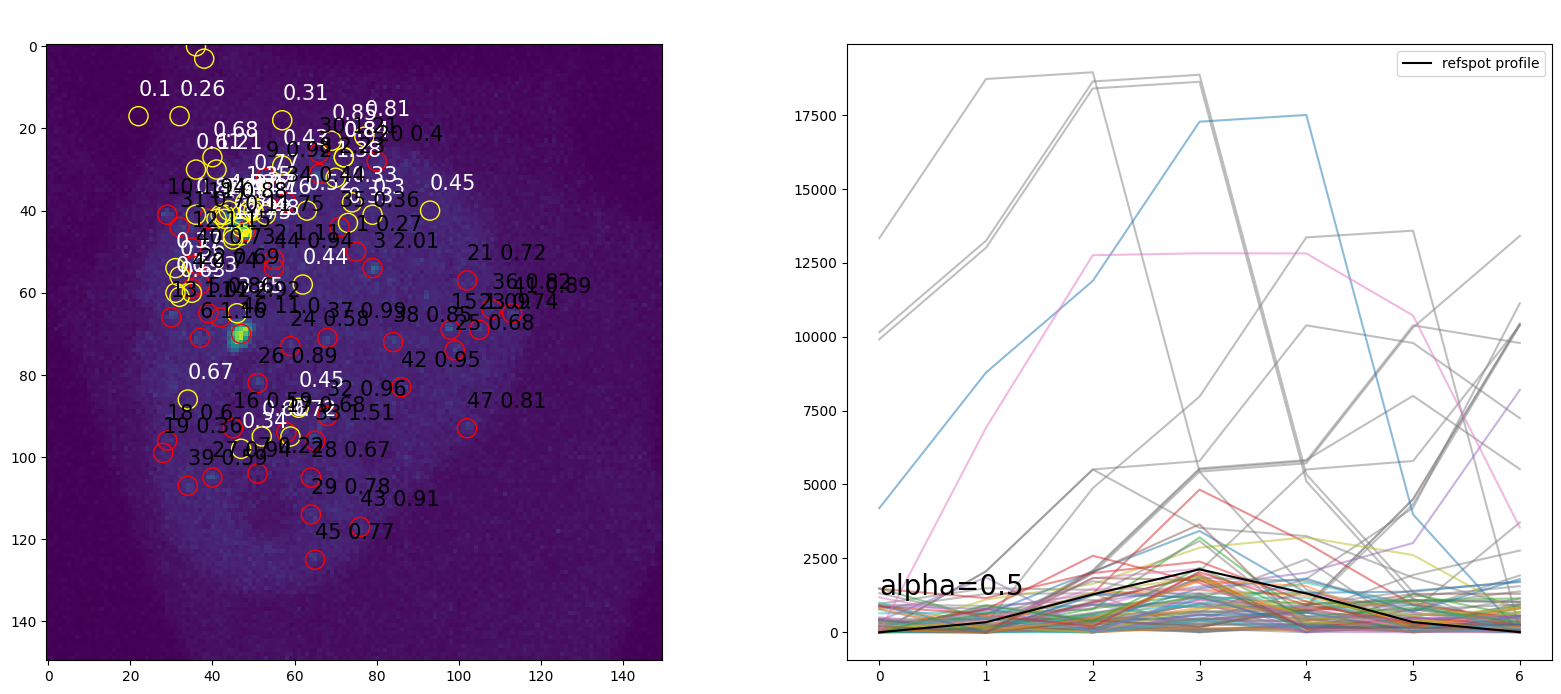

In [61]:
peaksref = np.max(np.max(reference_spot, axis=0), axis=1).astype(np.int64)-np.min(np.max(np.max(reference_spot, axis=0), axis=1))

plotBool = True

frameback = 20
framebacki = 0

if plotBool==True:   
    plt.figure(figsize=(20,8))
    ax1 = plt.subplot(1, 2, 1)
    ax1.imshow(mipSequenceCell[framn])
    ax1.scatter(spotsFrame[framn][:,2], spotsFrame[framn][:,1], marker='o', s=190, facecolors="None", edgecolors='red')
    ax2 = plt.subplot(1, 2, 2)
diffb = []

for jj in range(len(spotsFrame[framn])):
    frameback = random.sample(range(MaxTimePoint),1)[0]
    while spotsFrame[frameback].size==0:
        frameback = random.sample(range(MaxTimePoint),1)[0]
    spotBackground2D = getSpot2D(spotsFrame[frameback][framebacki], mipSequenceCell[framn], reference_spot)
    peaksb = np.max(spotBackground2D, axis=1)-np.min(np.max(spotBackground2D, axis=1))
    ddb = np.round(np.mean(peaksb)/np.mean(peaksref),2)
    if plotBool==True:
        ax1.scatter(spotsFrame[frameback][framebacki:framebacki+1,2],spotsFrame[frameback][framebacki:framebacki+1,1],marker='o', s=190, facecolors="None", edgecolors='yellow')
        ax1.text(spotsFrame[frameback][framebacki,2],spotsFrame[frameback][framebacki,1]-5, np.round(np.mean(peaksb)/np.mean(peaksref),2), fontsize=15, color='white')
        ax2.plot(peaksb, color= 'grey', alpha=0.5)
    diffb.append(ddb)

diff = []

for jj in range(len(spotsFrame[framn])):
    spotTest2D = getSpot2D(spotsFrame[framn][jj], mipSequenceCell[framn], reference_spot)
    peaksy = np.max(spotTest2D, axis=1)-np.min(np.max(spotTest2D, axis=1)).astype(np.int64)
    dd = np.round(np.mean(peaksy)/np.mean(peaksref),2)
    diff.append(dd)
    if plotBool==True: 
        ax2.plot(peaksy,  alpha=0.5) #str(jj)+'. '+ #, label='spot profile '+str(jj)
        ax1.text(spotsFrame[framn][jj,2],spotsFrame[framn][jj,1]-5, str(jj)+' '+str(np.round(np.mean(peaksy)/np.mean(peaksref),2)), fontsize=15)
if plotBool==True:
    ax2.plot(peaksref, color='black',label='refspot profile')
    ax2.text(0, peaksref.max()*0.6, 'alpha='+str(referenceSpot_Alpha), fontsize=20)
    ax2.legend()

image list found!
Found 4898
Found 4898 spots, max intensity = 1480


C:\Users\uid-1204\AppData\Local\anaconda3\envs\bigfishLive\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\uid-1204\AppData\Local\anaconda3\envs\bigfishLive\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


image list found!
Found 4898
Found 4898 spots, max intensity = 1813
image list found!
Found 4898
Found 4898 spots, max intensity = 2085
image list found!
Found 4898
Found 4898 spots, max intensity = 2329
image list found!
Found 4898
Found 4898 spots, max intensity = 2576
image list found!
Found 4898
Found 4898 spots, max intensity = 2861
image list found!
Found 4898
Found 4898 spots, max intensity = 3216
image list found!
Found 4898
Found 4898 spots, max intensity = 4399


Text(0.5, 0, 'frames')

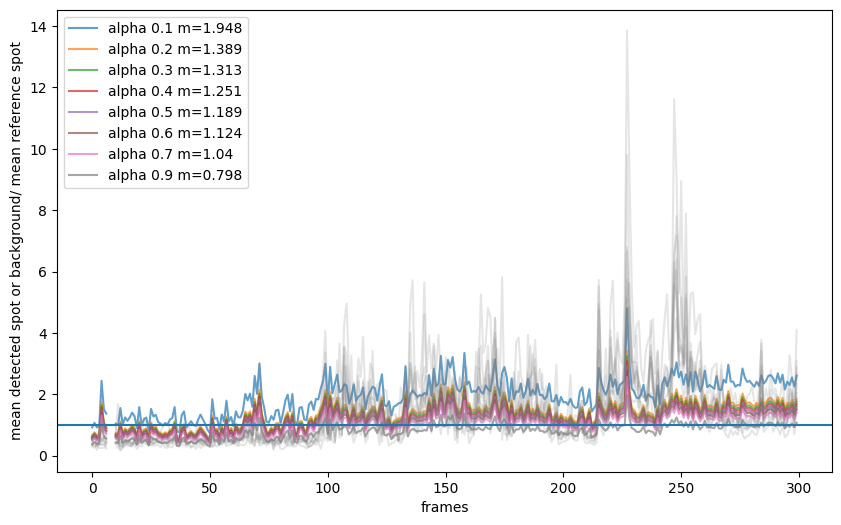

In [62]:
apoints = []
aback = []
alphas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9]
for referenceSpot_Alpha in alphas:
    ## Build reference spot
    reference_spot, spots_found, max_intensity = buildReferenceSpotFromImages(images, spots_list, 
                                                                          alpha=referenceSpot_Alpha, 
                                                                          gamma=referenceSpot_gamma, 
                                                                          voxelSize=voxelRadius, 
                                                                          objectSize=objectRadius)

    peaksref = np.max(np.max(reference_spot, axis=0), axis=1).astype(np.int64)-np.min(np.max(np.max(reference_spot, axis=0), axis=1))

    aXp=[]
    aXb=[]
    plotBool = False
    for framn in range(0,MaxTimePoint,3):
        frameback = 50
        framebacki = 0

        if plotBool==True:   
            plt.figure(figsize=(20,8))
            ax1 = plt.subplot(1, 2, 1)
            ax1.imshow(mipSequenceCell[framn])
            ax1.scatter(spotsFrame[framn][:,2], spotsFrame[framn][:,1], marker='o', s=190, facecolors="None", edgecolors='red')
            ax2 = plt.subplot(1, 2, 2)
        diffb = []
        for jj in range(len(spotsFrame[framn])):
            frameback = random.sample(range(MaxTimePoint),1)[0]
            while spotsFrame[frameback].size==0:
                frameback = random.sample(range(MaxTimePoint),1)[0]
            spotBackground2D = getSpot2D(spotsFrame[frameback][framebacki], mipSequenceCell[framn], reference_spot)
            peaksb = np.max(spotBackground2D, axis=1)-np.min(np.max(spotBackground2D, axis=1))
            ddb = np.round(np.mean(peaksb)/np.mean(peaksref),2)
            diffb.append(ddb)

        diff = []
        for jj in range(len(spotsFrame[framn])):
            spotTest2D = getSpot2D(spotsFrame[framn][jj], mipSequenceCell[framn], reference_spot)
            peaksy = np.max(spotTest2D, axis=1)-np.min(np.max(spotTest2D, axis=1)).astype(np.int64)
            dd = np.round(np.mean(peaksy)/np.mean(peaksref),2)
            diff.append(dd)

        aXb.append(np.mean(diffb))
        aXp.append(np.mean(diff))

    apoints.append(deepcopy(np.array(aXp)))
    aback.append(deepcopy(np.array(aXb)))
    
# Plot results    
plt.figure(figsize=(10,6))
i=0
for referenceSpot_Alpha in alphas:
    plt.plot(apoints[i], label='alpha '+str(referenceSpot_Alpha)+' m='+str(np.round(np.nanmean(apoints[i]),3)), alpha=0.7)
    plt.plot(aback[i], color='grey', alpha=0.2)
    i+=1

plt.axhline(1)
plt.legend()
plt.ylabel('mean detected spot or background/ mean reference spot')
plt.xlabel('frames')

In [ ]:
import session_info
session_info.show()